# This file processes wine data, and runs it through several models to predict if quality will be determined as good or bad, and tunes a Random Forest Classifier model to determine best parameter values



### Install required dependencies and read in csv data

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import models as tests
from sklearn.utils import resample


In [2]:
# Read in CSV data and check for nulls and dtypes
df = pd.read_csv('../datasets/wine_QT.csv')
df = df.drop(['Unnamed: 0','rt.sulfur.dioxide'],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4074 non-null   float64
 1   volatile.acidity      4074 non-null   float64
 2   citric.acid           4074 non-null   float64
 3   residual.sugar        4074 non-null   float64
 4   chlorides             4074 non-null   float64
 5   free.sulfur.dioxide   4074 non-null   float64
 6   total.sulfur.dioxide  4074 non-null   float64
 7   pH                    4074 non-null   float64
 8   sulphates             4074 non-null   float64
 9   alcohol               4074 non-null   float64
 10  quality               4074 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 350.2 KB


In [3]:
# Read in CSV data to run initial models for baseline results
df_initial = df.copy()

# Check column names, null values and Dtypes
df_initial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4074 non-null   float64
 1   volatile.acidity      4074 non-null   float64
 2   citric.acid           4074 non-null   float64
 3   residual.sugar        4074 non-null   float64
 4   chlorides             4074 non-null   float64
 5   free.sulfur.dioxide   4074 non-null   float64
 6   total.sulfur.dioxide  4074 non-null   float64
 7   pH                    4074 non-null   float64
 8   sulphates             4074 non-null   float64
 9   alcohol               4074 non-null   float64
 10  quality               4074 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 350.2 KB


In [4]:
# Read in CSV data to attempt sampling for better results
df_sample = df.copy()

# Check column names, null values and Dtypes
df_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4074 non-null   float64
 1   volatile.acidity      4074 non-null   float64
 2   citric.acid           4074 non-null   float64
 3   residual.sugar        4074 non-null   float64
 4   chlorides             4074 non-null   float64
 5   free.sulfur.dioxide   4074 non-null   float64
 6   total.sulfur.dioxide  4074 non-null   float64
 7   pH                    4074 non-null   float64
 8   sulphates             4074 non-null   float64
 9   alcohol               4074 non-null   float64
 10  quality               4074 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 350.2 KB


### Run initial data through models to get initial baseline scores

In [5]:
# Set X and y variables to determine initial baseline score
X0 = df_initial.drop(columns=['quality'])
y0 = df_initial['quality']

In [6]:
# Split data into training and testing data
X_train0,X_test0,y_train0,y_test0 = train_test_split(X0,y0,random_state=13)


Random Forest 
Test Accuracy: 0.6800785083415113
balanced test score: 0.3762970959553234
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.71      0.24      0.36        21
           5       0.73      0.68      0.71       297
           6       0.64      0.78      0.70       455
           7       0.69      0.59      0.64       197
           8       0.94      0.35      0.51        46
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1019
   macro avg       0.53      0.38      0.42      1019
weighted avg       0.69      0.68      0.67      1019



c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gradient Boost 
Test Accuracy: 0.5976447497546614
balanced test score: 0.2976004770815125

 classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.60      0.14      0.23        21
           5       0.67      0.59      0.63       297
           6       0.57      0.74      0.65       455
           7       0.57      0.44      0.50       197
           8       0.62      0.17      0.27        46
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1019
   macro avg       0.43      0.30      0.32      1019
weighted avg       0.60      0.60      0.58      1019


Logistic Regression 
Test Accuracy: 0.5152109911678115
balanced test score: 0.2055791226204569
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
 

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being 


Poly Support Vector 
Test Accuracy: 0.5466143277723258
Balanced test score: 0.2292147926854866
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.05      0.08        21
           5       0.65      0.42      0.51       297
           6       0.52      0.83      0.64       455
           7       0.55      0.26      0.36       197
           8       1.00      0.04      0.08        46
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1019
   macro avg       0.44      0.23      0.24      1019
weighted avg       0.58      0.55      0.51      1019


ADA low estimators 
Test Accuracy: 0.4435721295387635
balanced test score: 0.1856260141974428
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.10      0.12        21

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-p


ADA 
Test Accuracy: 0.43572129538763493
balanced test score: 0.15488638345781203
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.10      0.11        21
           5       0.43      0.05      0.09       297
           6       0.46      0.94      0.62       455
           7       0.00      0.00      0.00       197
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00         1

    accuracy                           0.44      1019
   macro avg       0.14      0.15      0.12      1019
weighted avg       0.33      0.44      0.30      1019



c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVC Sigmoid 
Test Accuracy: 0.4102060843964671
balanced test score: 0.1831508378281402
classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.05      0.07        21
           5       0.40      0.36      0.38       297
           6       0.47      0.53      0.50       455
           7       0.30      0.34      0.32       197
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00         1

    accuracy                           0.41      1019
   macro avg       0.19      0.18      0.18      1019
weighted avg       0.39      0.41      0.40      1019



c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


non-tuned models dataframe
                     Trained Score  Test Score  Balanced Test Score  \
Model Name                                                            
Random Forest             1.000000    0.680079             0.376297   
Gradient Boosting         0.748609    0.597645             0.297600   
SVC poly                  0.602291    0.546614             0.229215   
Logistic Regression       0.541080    0.515211             0.205579   
ADA Low Estimators        0.449100    0.443572             0.185626   
SVC sigmoid               0.406547    0.410206             0.183151   
ADA boost                 0.442226    0.435721             0.154886   

                     Balanced Difference  
Model Name                                
Random Forest                   0.623703  
Gradient Boosting               0.470382  
SVC poly                        0.085947  
Logistic Regression             0.006267  
ADA Low Estimators              0.036760  
SVC sigmoid                    -

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



best results:
            n_estimators  max_depth  min_split  max_leaf  min_samples_leaf  \
test_score                                                                   
0.285957              98         18          8       197                 2   
0.285790              98         18          8       194                 2   
0.285554              98         16          8       194                 2   
0.285097              90         15          6       197                 2   
0.284995              98         18          8       191                 2   
...                  ...        ...        ...       ...               ...   
0.263688              76         18         10       185                 5   
0.263688              76         18          6       185                 5   
0.263688              76         18          4       185                 5   
0.263688              76         18          2       185                 5   
0.263688              76         18          8   

c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nick\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


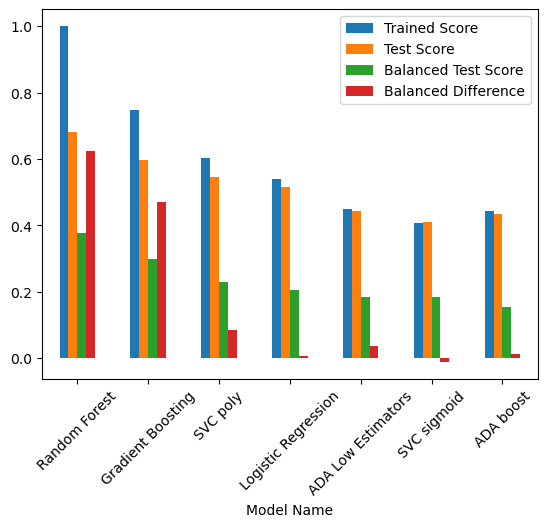

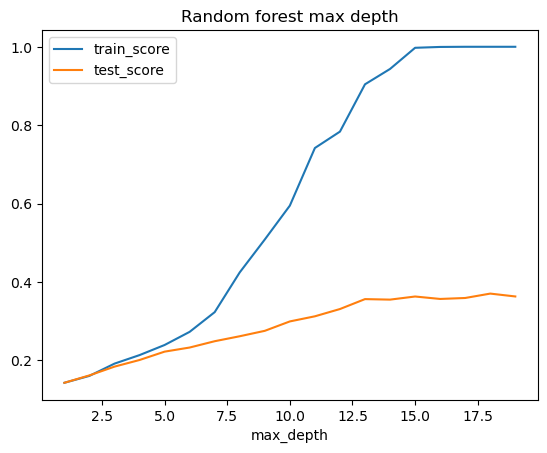

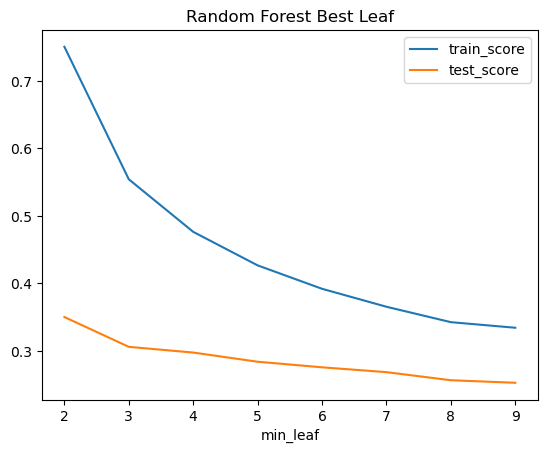

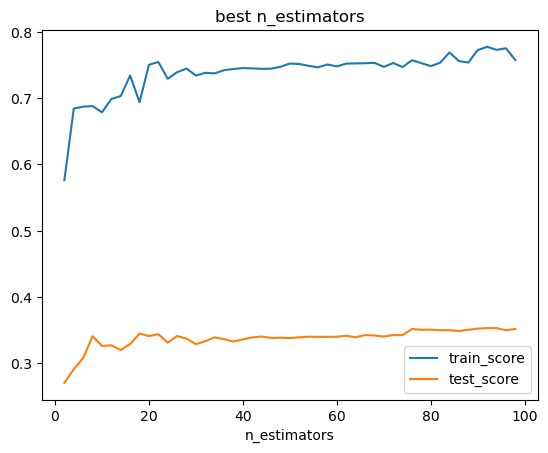

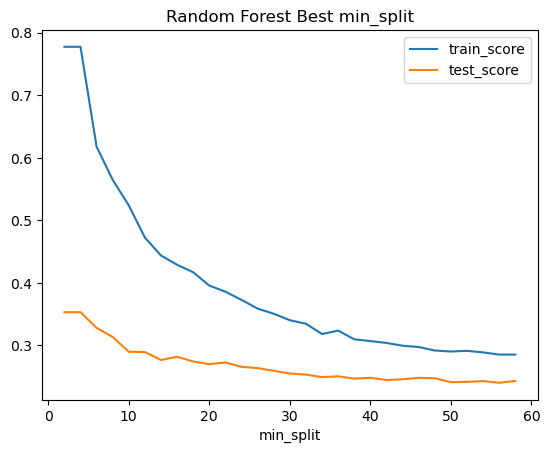

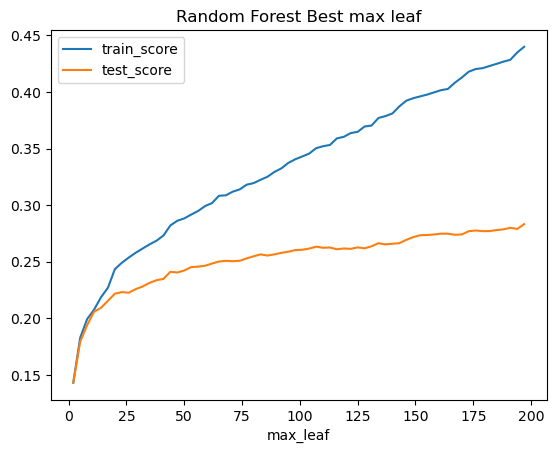

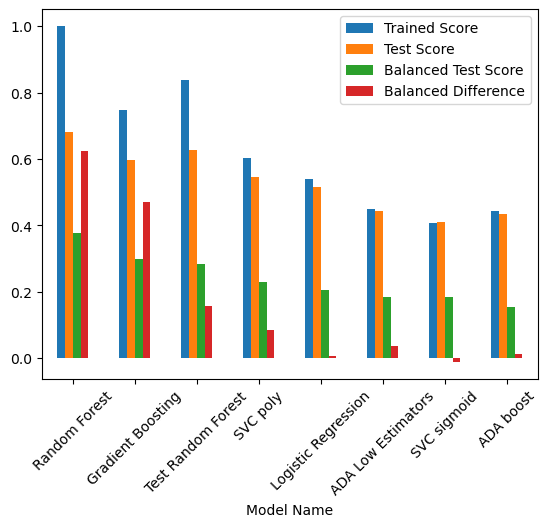

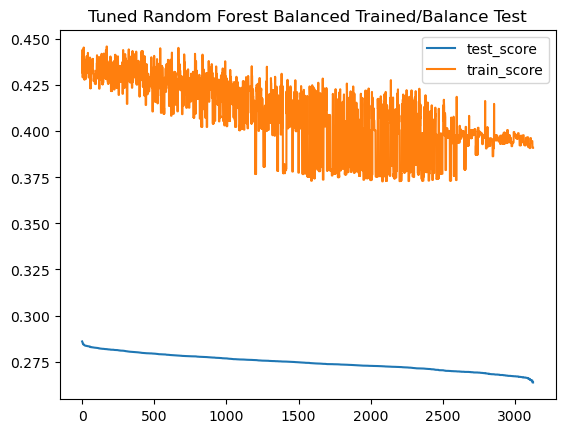

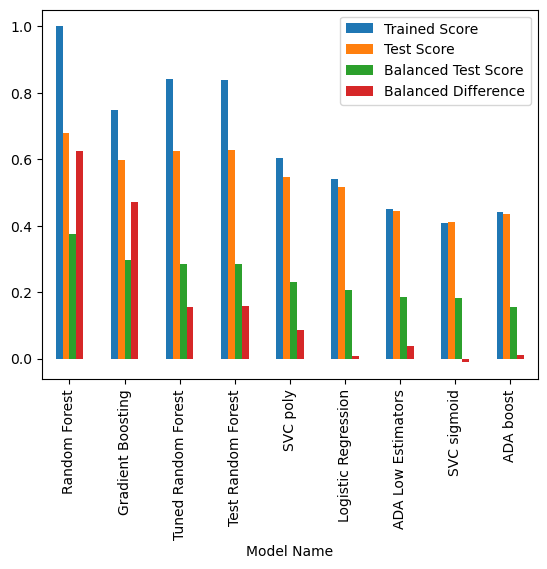

In [7]:
# Run data through function many_models to determine scores and initial parameter optimization for Random Forest Classifier Model
models_full_preprocess = tests.many_models_full(X_train0,y_train0,X_test0,y_test0)

## Process Data for using in machine learning models
### Bin into good and bad categories

In [8]:
# Check unique values of quality column
df['quality'].unique()

array([6, 7, 5, 4, 8, 9, 3], dtype=int64)

In [9]:
# Check how many of each value to pick where to create good/bad thresholds
df['quality'].value_counts(normalize=True)

quality
6    0.462199
5    0.278351
7    0.196858
8    0.036573
4    0.022582
3    0.002455
9    0.000982
Name: proportion, dtype: float64

In [10]:
# Create threshold for bad category 
# 5/6 was decided due to wine quality reviews 1-9 ratings standard breakdown definitions.
# (6 is considered good quality, 5 bad) and no 1 or 2 values given in ratings, 3 and 9 are outliers.
threshold = 5
df['quality'] = df['quality'].where(df['quality'] > threshold, other=0)

# Check quality column for unique value changes
print(df['quality'].unique())

[6 7 0 8 9]


In [11]:
# Create threshold for good category
threshold = 6
df['quality'] = df['quality'].where(df['quality'] < threshold, other=1)

# Check quality column for unique value changes
print(df['quality'].unique())

[1 0]


In [12]:
# Check value percentages
df['quality'].value_counts(normalize=True)

quality
1    0.696613
0    0.303387
Name: proportion, dtype: float64

### Sample data to determine if sampling or binning is better

In [13]:
# Check quality column value percentages to determine sampling
df_sample['quality'].value_counts(normalize=True)

quality
6    0.462199
5    0.278351
7    0.196858
8    0.036573
4    0.022582
3    0.002455
9    0.000982
Name: proportion, dtype: float64

In [14]:
# Check quality column values
df_sample['quality'].value_counts()

quality
6    1883
5    1134
7     802
8     149
4      92
3      10
9       4
Name: count, dtype: int64

In [15]:
# Check quality column values mean
df_sample['quality'].value_counts().mean()

582.0

In [16]:
# Set columns as variables for sampling
df_3 = df_sample[df_sample.quality==3]               
df_4 = df_sample[df_sample.quality==4]               
df_5 = df_sample[df_sample.quality==5]     
df_6 = df_sample[df_sample.quality==6]     
df_7 = df_sample[df_sample.quality==7]     
df_8 = df_sample[df_sample.quality==8]     

In [17]:
# 'n_samples' Chosen based on mean after removing outlier values (992)
#  gave best results after testing

# Resample data to equalize values
df_3_ups = resample(df_3, replace=True, n_samples=1000) 
df_4_ups = resample(df_4, replace=True, n_samples=1000) 
df_7_ups = resample(df_7, replace=True, n_samples=1000) 
df_8_ups = resample(df_8, replace=True, n_samples=1000)

# Decreases the rows of Majority one's to make balance data
df_5_downs = df_5[df_5.quality==5].sample(n=1000).reset_index(drop=True)
df_6_downs = df_6[df_6.quality==6].sample(n=1000).reset_index(drop=True)
#df_7_downs = df_7[df_7.quality==7].sample(n=600).reset_index(drop=True)


In [18]:
# Combine sampled columns into dataframe
sampled_q = pd.concat([df_3_ups, df_4_ups, df_7_ups, 
                        df_8_ups, df_5_downs, df_6_downs]).reset_index(drop=True)


# Display new sampled dataframe
sampled_q

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,pH,sulphates,alcohol,quality
0,4.2,0.215,0.23,5.10,0.041,64.0,157.0,3.42,0.44,8.0,3
1,8.3,0.330,0.42,1.15,0.033,18.0,96.0,3.20,0.32,12.4,3
2,6.9,0.390,0.40,4.60,0.022,5.0,19.0,3.31,0.37,12.6,3
3,7.6,0.480,0.37,1.20,0.034,5.0,57.0,3.05,0.54,10.4,3
4,7.5,0.320,0.24,4.60,0.053,8.0,134.0,3.14,0.50,9.1,3
...,...,...,...,...,...,...,...,...,...,...,...
5995,6.3,0.370,0.37,1.50,0.024,12.0,76.0,2.94,0.39,12.3,6
5996,6.1,0.370,0.46,12.00,0.042,61.0,210.0,3.17,0.59,9.7,6
5997,7.3,0.220,0.37,14.30,0.063,48.0,191.0,2.89,0.38,9.0,6
5998,6.0,0.280,0.24,17.80,0.047,42.0,111.0,3.10,0.45,8.9,6


In [19]:
# Create a new dataframe for the combined processing data
combined_df = sampled_q.copy()

## Check column importance and correlation to determine features to use

In [20]:
# Create initial Random Forest Classifier Model to determine feature importance
rf_importance = RandomForestClassifier(random_state=13)

# Fit data to initial Random Forest Classifier Model
rf_importance.fit(X_train0, y_train0)

RandomForestClassifier(random_state=13)

In [21]:
# Make predictions to determine feature importance
y_train_pred = rf_importance.predict(X_train0)
y_test_pred = rf_importance.predict(X_test0)

In [22]:
# Create variables to store accuracy_scores and Balanced Accuracy Score
train_accuracy = accuracy_score(y_train0, y_train_pred)
test_accuracy = accuracy_score(y_test0, y_test_pred)
balanced_test = balanced_accuracy_score(y_test0, y_test_pred)

# Show results of initial Random Forest Classifier Model
print(f'\nRandom Forest \nTrain Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}\nBalanced Test Score: {balanced_test}')


Random Forest 
Train Accuracy: 1.0
Test Accuracy: 0.6800785083415113
Balanced Test Score: 0.3762970959553234


### Create feature_importance_ instance to View most important features

In [23]:
# Create variable to store most important features
importances = rf_importance.feature_importances_

# Sort most important features for better usage
importances_sorted = sorted(zip(importances, X0.columns), reverse=True)

# View most important features
print("Most Important Features:")

# Loop through to display features and importance percentage
for importance, feature in importances_sorted[:11]:
    print(f"{feature}: {importance:.4f}")

Most Important Features:
alcohol: 0.1365
free.sulfur.dioxide: 0.1023
total.sulfur.dioxide: 0.1016
residual.sugar: 0.1001
volatile.acidity: 0.0995
chlorides: 0.0976
pH: 0.0970
citric.acid: 0.0913
sulphates: 0.0878
fixed.acidity: 0.0861


In [24]:
# Check feature correlation to quality column
df_initial.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.422836
pH                      0.079153
citric.acid             0.035827
sulphates               0.018179
free.sulfur.dioxide     0.017036
fixed.acidity          -0.052419
residual.sugar         -0.105660
volatile.acidity       -0.117126
total.sulfur.dioxide   -0.165039
chlorides              -0.279538
Name: quality, dtype: float64

### using feature importance prepare data for machine learning models

In [25]:
# Drop columns based on feature importance(less than 9%), and set as X and y variables for sample data
X = sampled_q.drop(columns=['quality','fixed.acidity','sulphates'])
y = sampled_q['quality']
X, y

(      volatile.acidity  citric.acid  residual.sugar  chlorides  \
 0                0.215         0.23            5.10      0.041   
 1                0.330         0.42            1.15      0.033   
 2                0.390         0.40            4.60      0.022   
 3                0.480         0.37            1.20      0.034   
 4                0.320         0.24            4.60      0.053   
 ...                ...          ...             ...        ...   
 5995             0.370         0.37            1.50      0.024   
 5996             0.370         0.46           12.00      0.042   
 5997             0.220         0.37           14.30      0.063   
 5998             0.280         0.24           17.80      0.047   
 5999             0.260         0.32            1.20      0.041   
 
       free.sulfur.dioxide  total.sulfur.dioxide    pH  alcohol  
 0                    64.0                 157.0  3.42      8.0  
 1                    18.0                  96.0  3.20     12.

In [26]:
# Drop columns based on feature importance and correlation, and set as X and y variables for bins models tests
X1 = df.drop(columns=['quality','fixed.acidity','sulphates'])
y1 = df['quality']
X1, y1

(      volatile.acidity  citric.acid  residual.sugar  chlorides  \
 0                 0.33         0.32            11.1      0.036   
 1                 0.27         0.29            12.2      0.044   
 2                 0.30         0.51            13.6      0.050   
 3                 0.38         0.27             7.5      0.041   
 4                 0.12         0.38             0.9      0.034   
 ...                ...          ...             ...        ...   
 4069              0.33         0.38             8.3      0.048   
 4070              0.34         0.40             8.1      0.046   
 4071              0.23         0.38             1.3      0.032   
 4072              0.32         0.36             8.0      0.047   
 4073              0.21         0.38             0.8      0.020   
 
       free.sulfur.dioxide  total.sulfur.dioxide    pH  alcohol  
 0                    25.0                 119.0  3.15    10.50  
 1                    59.0                 196.0  3.14     8.8

### split data into training and test variables

In [27]:
# Split dropped column data into training and testing data for sampled data tests
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

In [28]:
# Split dropped column data into training and testing data for bins models tests
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,random_state=13)

## Use processed data to determine best scores
### Run bin data through many_models functions to determine best scores

Binned Data results full

Random Forest 
Test Accuracy: 0.8341511285574092
balanced test score: 0.7910050071530759
classification report: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       320
           1       0.86      0.91      0.88       699

    accuracy                           0.83      1019
   macro avg       0.81      0.79      0.80      1019
weighted avg       0.83      0.83      0.83      1019


Gradient Boost 
Test Accuracy: 0.7841020608439647
balanced test score: 0.7206366237482118

 classification report: 
               precision    recall  f1-score   support

           0       0.70      0.55      0.62       320
           1       0.81      0.89      0.85       699

    accuracy                           0.78      1019
   macro avg       0.76      0.72      0.73      1019
weighted avg       0.78      0.78      0.78      1019


Logistic Regression 
Test Accuracy: 0.7438665358194309
balanced test score: 0.653185354

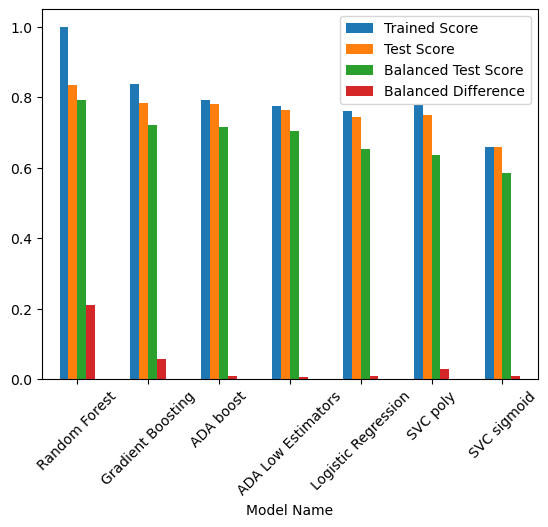

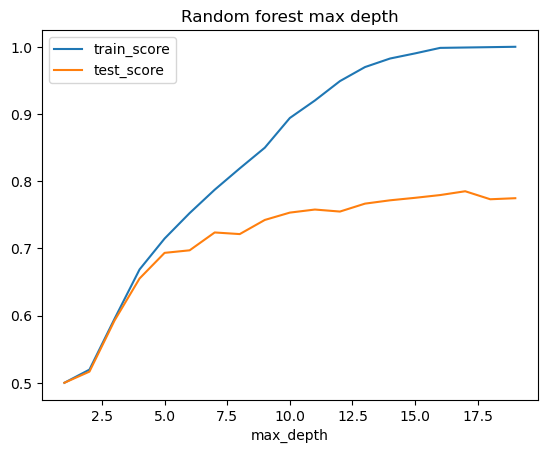

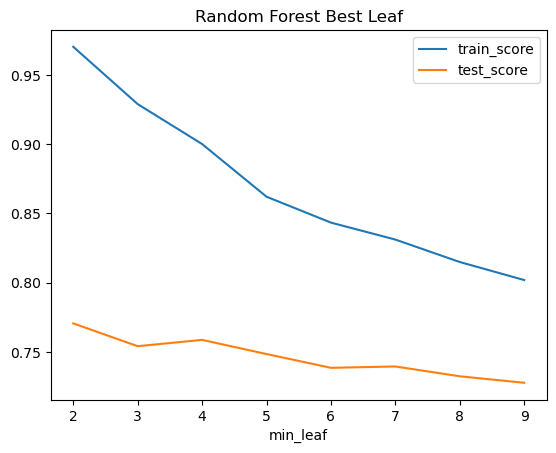

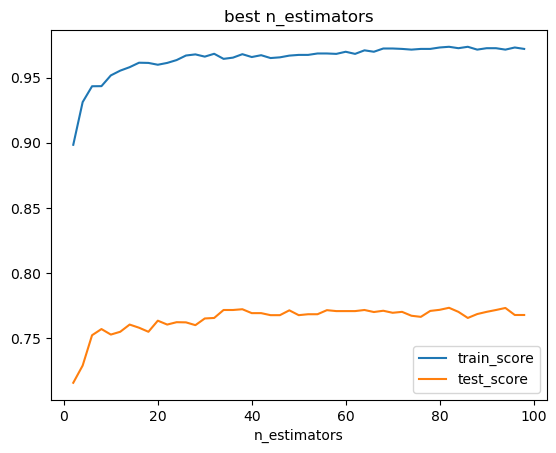

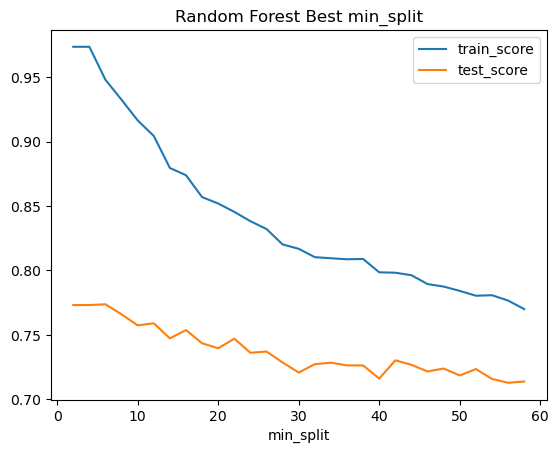

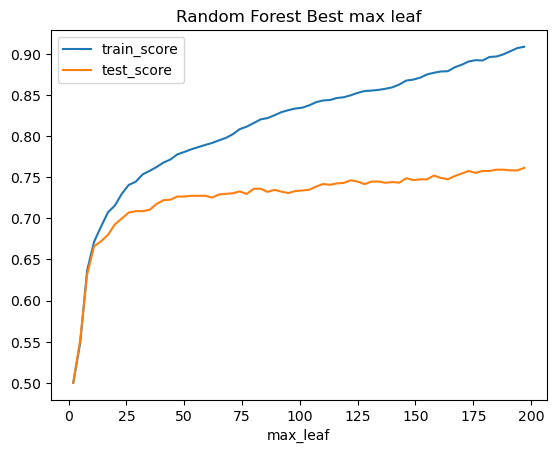

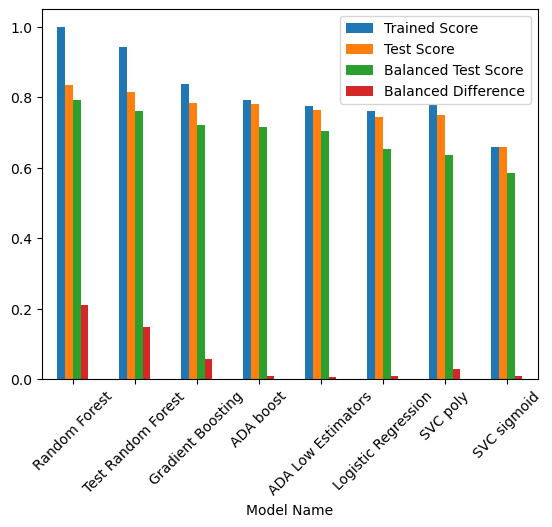

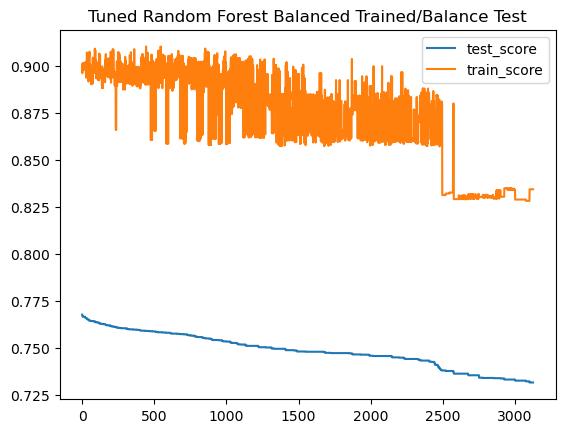

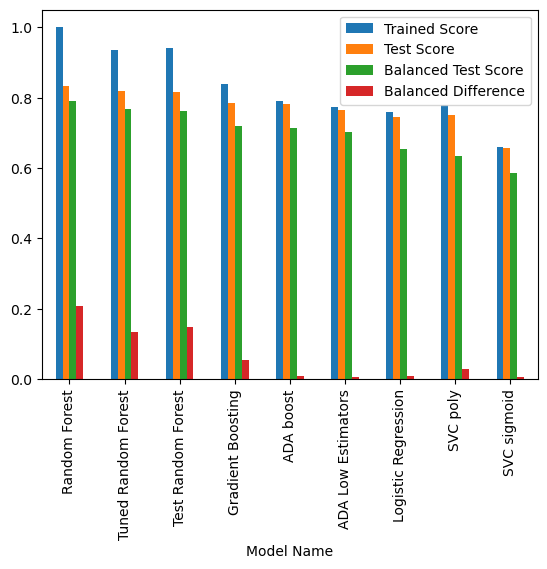

In [29]:
# Run data through many_models_full function to determine scores and optimize Random Forest Classifier Model
print('Binned Data results full')
models_full_bin = tests.many_models_full(X_train1,y_train1,X_test1,y_test1)

In [30]:
# Run data through many_models_no_leaf function to determine scores and optimize Random Forest Classifier Model
#print('Binned Data results no min/max leaf')
#models_no_leaf_bin = tests.many_models_no_leaf(X_train1,y_train1,X_test1,y_test1)

In [31]:
# Run data through many_models_min_leaf function to determine scores and optimize Random Forest Classifier Model
#print('Binned Data results min_leaf')
#models_min_leaf_bin = tests.many_models_min_leaf(X_train1,y_train1,X_test1,y_test1)

In [32]:
# Run data through many_models_max_leaf function to determine scores and optimize Random Forest Classifier Model
#print('Binned Data results max_leaf')
#models_max_leaf_bin = tests.many_models_max_leaf(X_train1,y_train1,X_test1,y_test1)

### Run sampled data through models

Sampled Data results Full

Random Forest 
Test Accuracy: 0.8653333333333333
balanced test score: 0.8655526856613812
classification report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       241
           4       0.97      1.00      0.99       255
           5       0.70      0.78      0.73       240
           6       0.68      0.56      0.61       253
           7       0.83      0.86      0.85       259
           8       0.99      1.00      0.99       252

    accuracy                           0.87      1500
   macro avg       0.86      0.87      0.86      1500
weighted avg       0.86      0.87      0.86      1500


Gradient Boost 
Test Accuracy: 0.7646666666666667
balanced test score: 0.7656549780590701

 classification report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       241
           4       0.85      0.93      0.89       255
           5       0.58      0.63  

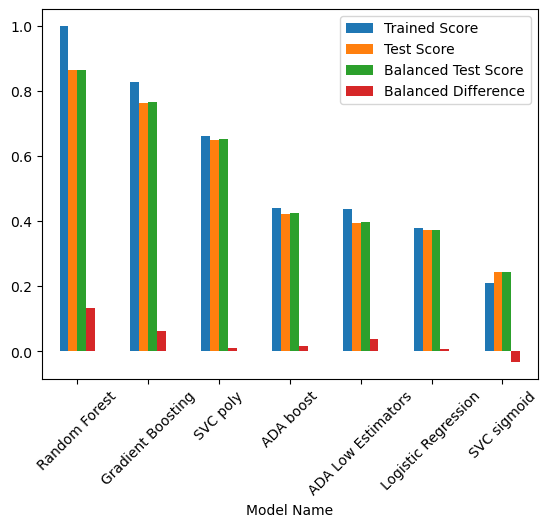

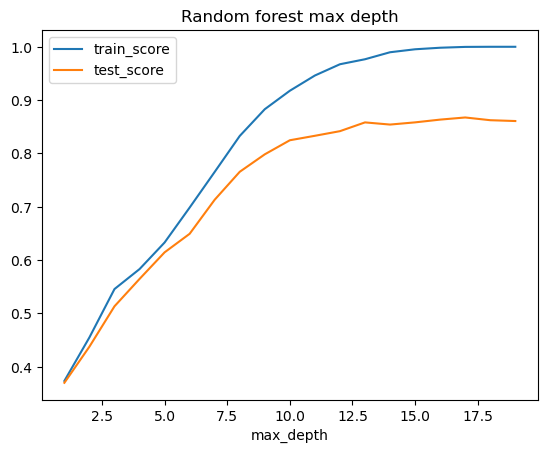

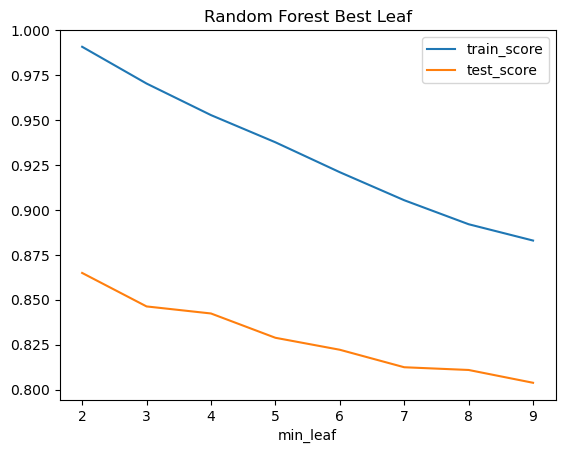

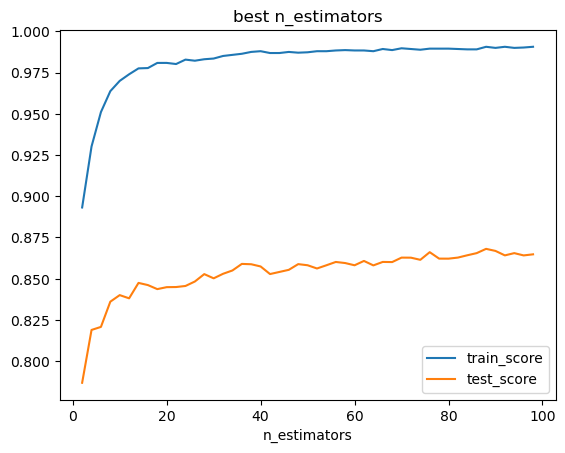

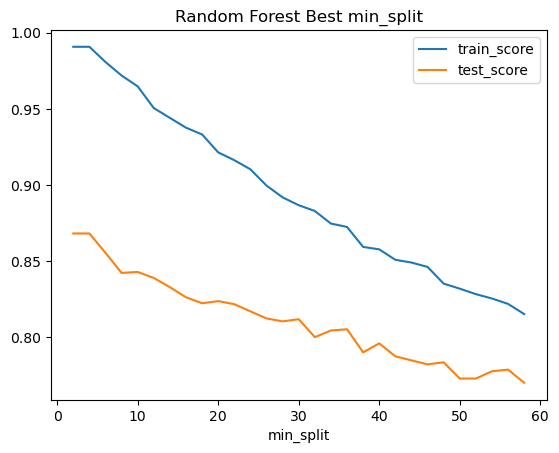

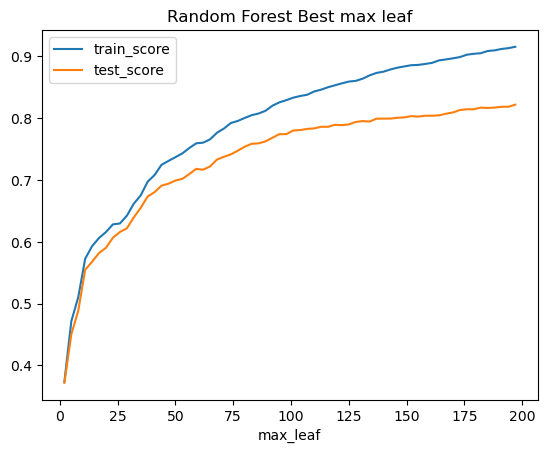

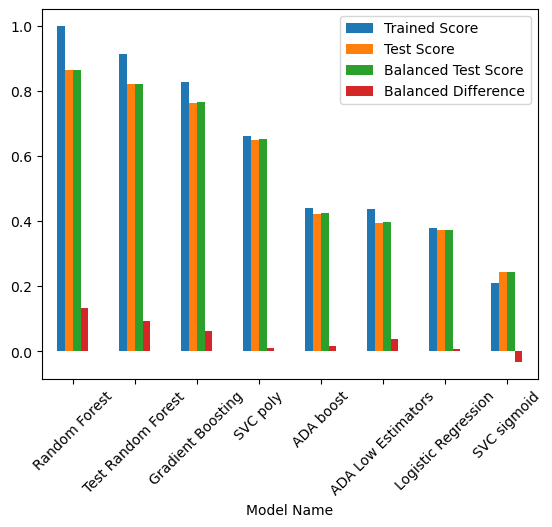

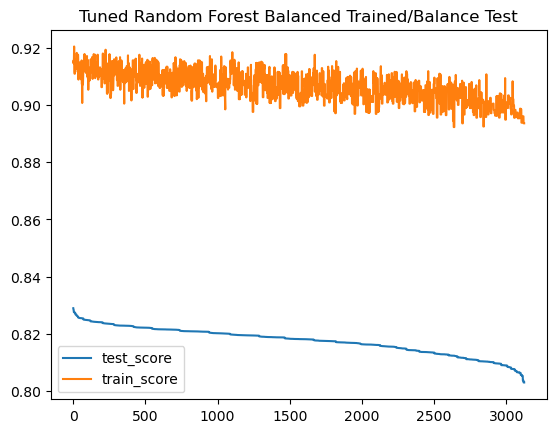

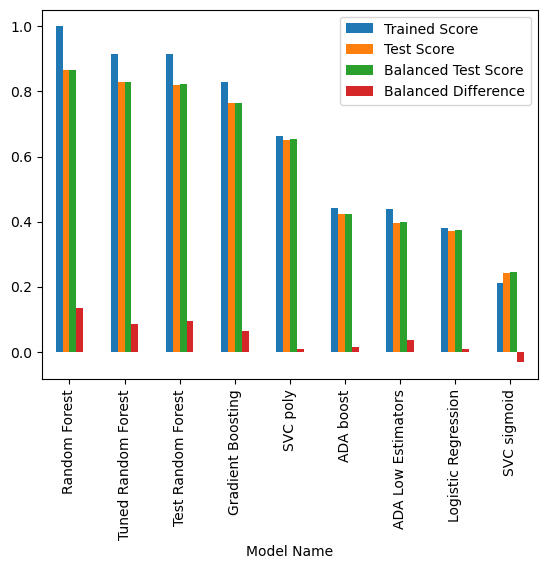

In [33]:
# Run sampled data through many_models_full function to determine scores and optimize Random Forest Classifier Model
print('Sampled Data results Full')
models_full_sample = tests.many_models_full(X_train,y_train,X_test,y_test)

In [34]:
# Run sampled data through many_models_min_leaf function to determine if 'min_leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
#print('Sampled Data results min_leaf')
#models_min_leaf_sample = tests.many_models_min_leaf(X_train,y_train,X_test,y_test)

In [35]:
# Run sampled data through many_models_max_leaf function to determine if 'max_leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
#print('Sampled Data results max_leaf')
#models_max_leaf_sample = tests.many_models_max_leaf(X_train,y_train,X_test,y_test)

In [36]:
# Run sampled data through many_models_no_leaf function to determine if 'no min/max leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
#print('Sampled Data results no min/max leaf')
#models_no_leaf_sample = tests.many_models_no_leaf(X_train,y_train,X_test,y_test)

## Combine sampled data into bins and test models
### bin combined data 

In [37]:
# View dataframe
combined_df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,pH,sulphates,alcohol,quality
0,4.2,0.215,0.23,5.10,0.041,64.0,157.0,3.42,0.44,8.0,3
1,8.3,0.330,0.42,1.15,0.033,18.0,96.0,3.20,0.32,12.4,3
2,6.9,0.390,0.40,4.60,0.022,5.0,19.0,3.31,0.37,12.6,3
3,7.6,0.480,0.37,1.20,0.034,5.0,57.0,3.05,0.54,10.4,3
4,7.5,0.320,0.24,4.60,0.053,8.0,134.0,3.14,0.50,9.1,3
...,...,...,...,...,...,...,...,...,...,...,...
5995,6.3,0.370,0.37,1.50,0.024,12.0,76.0,2.94,0.39,12.3,6
5996,6.1,0.370,0.46,12.00,0.042,61.0,210.0,3.17,0.59,9.7,6
5997,7.3,0.220,0.37,14.30,0.063,48.0,191.0,2.89,0.38,9.0,6
5998,6.0,0.280,0.24,17.80,0.047,42.0,111.0,3.10,0.45,8.9,6


In [38]:
# Create threshold for bad category
threshold = 5
combined_df['quality'] = combined_df['quality'].where(combined_df['quality'] > threshold, other=0)

# Check quality column for unique value changes
print(combined_df['quality'].unique())

[0 7 8 6]


In [39]:
# Create threshold for good category
threshold = 6
combined_df['quality'] = combined_df['quality'].where(combined_df['quality'] < threshold, other=1)

# Check quality column for unique value changes
print(combined_df['quality'].unique())
print(combined_df['quality'].value_counts())

[0 1]
quality
0    3000
1    3000
Name: count, dtype: int64


In [40]:
# View updated combined Dataframe
combined_df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,pH,sulphates,alcohol,quality
0,4.2,0.215,0.23,5.10,0.041,64.0,157.0,3.42,0.44,8.0,0
1,8.3,0.330,0.42,1.15,0.033,18.0,96.0,3.20,0.32,12.4,0
2,6.9,0.390,0.40,4.60,0.022,5.0,19.0,3.31,0.37,12.6,0
3,7.6,0.480,0.37,1.20,0.034,5.0,57.0,3.05,0.54,10.4,0
4,7.5,0.320,0.24,4.60,0.053,8.0,134.0,3.14,0.50,9.1,0
...,...,...,...,...,...,...,...,...,...,...,...
5995,6.3,0.370,0.37,1.50,0.024,12.0,76.0,2.94,0.39,12.3,1
5996,6.1,0.370,0.46,12.00,0.042,61.0,210.0,3.17,0.59,9.7,1
5997,7.3,0.220,0.37,14.30,0.063,48.0,191.0,2.89,0.38,9.0,1
5998,6.0,0.280,0.24,17.80,0.047,42.0,111.0,3.10,0.45,8.9,1


### split combined data into training and testing data

In [41]:
# Set X and y variables
X2 = combined_df.drop(['quality','fixed.acidity','sulphates'],axis=1)
y2 = combined_df['quality']

In [42]:
# Split into training and testing data
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,random_state=13)

### Run combined sampled and binned data through models

In [43]:
# Run combined data through many_models_full function to determine if all parameter settings are worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results full leaf')
models_full_combined = tests.many_models_full(X_train2,y_train2,X_test2,y_test2)

Combined Data results full leaf

Random Forest 
Test Accuracy: 0.92
balanced test score: 0.9200717049852037
classification report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       736
           1       0.93      0.92      0.92       764

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500


Gradient Boost 
Test Accuracy: 0.8726666666666667
balanced test score: 0.8731326826769861

 classification report: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       736
           1       0.90      0.85      0.87       764

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500


Logistic Regression 
Test Accuracy: 0.742
balanced test score: 0.7424702651946278
classificati

In [ ]:
# Run combined data through many_models_no_leaf function to determine if 'no min/max leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
#print('Combined Data results no min/max leaf')
#models_no_leaf_combined = tests.many_models_no_leaf(X_train2,y_train2,X_test2,y_test2)

In [ ]:
# Run combined data through many_models_min_leaf function to determine if ' min leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results min leaf')
models_min_leaf_combined = tests.many_models_min_leaf(X_train2,y_train2,X_test2,y_test2)

In [ ]:
# Run combined data through many_models_max_leaf function to determine if 'no max leaf' parameter setting is worth extra time.
# score and optimize Random Forest Classifier Model
print('Combined Data results max leaf')
models_max_leaf_combined = tests.many_models_max_leaf(X_train2,y_train2,X_test2,y_test2)